In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Number of samples and features
n_samples = 200
n_features = 2

# Generate random features
X = np.random.randn(n_samples, n_features)

# True weights and bias
true_w = np.array([3.5, -2.0])
true_b = 4.0

# Noise
noise = np.random.randn(n_samples) * 0.5

# Target
y = X @ true_w + true_b + noise


In [2]:
class StandardScaler:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [3]:
class LinearRegressionGD:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.1):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.w = np.zeros(n_features)
        self.b = 0
        self.losses = []

        for _ in range(self.epochs):
            # Predictions
            y_pred = X @ self.w + self.b

            # Errors
            error = y_pred - y

            # Gradients
            dw = (2/n_samples) * (X.T @ error) + 2 * self.l2_lambda * self.w
            db = (2/n_samples) * np.sum(error)

            # Update parameters
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # Loss
            loss = np.mean(error ** 2) + self.l2_lambda * np.sum(self.w ** 2)
            self.losses.append(loss)

    def predict(self, X):
        return X @ self.w + self.b


In [4]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
model = LinearRegressionGD(lr=0.05, epochs=1500, l2_lambda=0.1)
model.fit(X_scaled, y)

# Predictions
y_pred = model.predict(X_scaled)


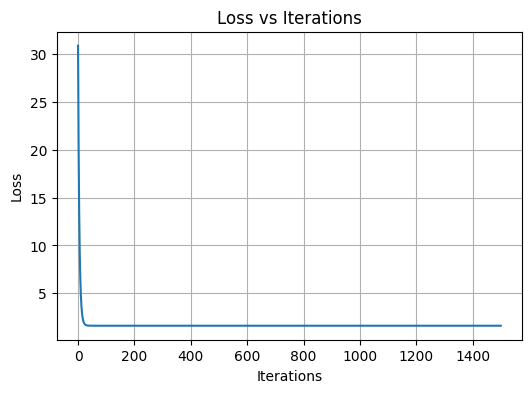

In [5]:
plt.figure(figsize=(6,4))
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.grid()
plt.show()


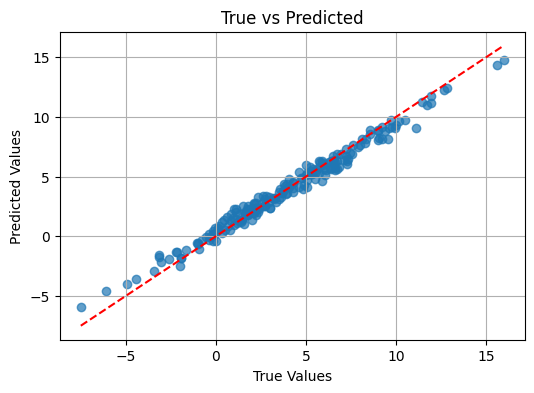

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted")
plt.grid()
plt.show()


In [7]:
print("True weights:", true_w)
print("Learned weights:", model.w)
print("True bias:", true_b)
print("Learned bias:", model.b)


True weights: [ 3.5 -2. ]
Learned weights: [ 3.07287966 -1.7373039 ]
True bias: 4.0
Learned bias: 3.901860331373128


In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Number of samples
n_samples = 300

# Class 0
X0 = np.random.randn(n_samples // 2, 2) + np.array([-2, -2])
y0 = np.zeros(n_samples // 2)

# Class 1
X1 = np.random.randn(n_samples // 2, 2) + np.array([2, 2])
y1 = np.ones(n_samples // 2)

# Combine
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))


In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
class LogisticRegressionGD:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.1):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.w = np.zeros(n_features)
        self.b = 0
        self.losses = []

        for _ in range(self.epochs):
            # Linear model
            z = X @ self.w + self.b
            y_hat = sigmoid(z)

            # Avoid log(0)
            eps = 1e-9

            # Binary Cross Entropy Loss
            loss = -np.mean(
                y * np.log(y_hat + eps) +
                (1 - y) * np.log(1 - y_hat + eps)
            ) + self.l2_lambda * np.sum(self.w ** 2)

            self.losses.append(loss)

            # Gradients
            error = y_hat - y
            dw = (1/n_samples) * (X.T @ error) + 2 * self.l2_lambda * self.w
            db = (1/n_samples) * np.sum(error)

            # Update
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        return sigmoid(X @ self.w + self.b)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)


In [10]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
model = LogisticRegressionGD(lr=0.1, epochs=1500, l2_lambda=0.05)
model.fit(X_scaled, y)


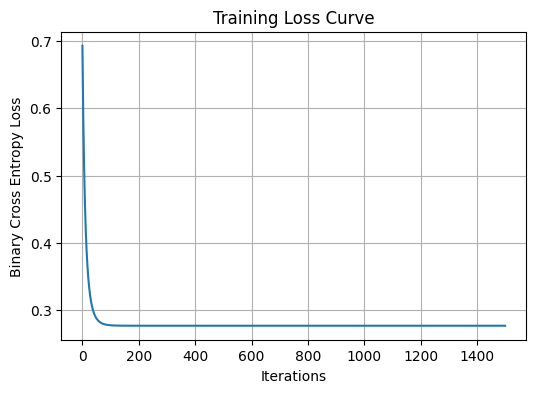

In [11]:
plt.figure(figsize=(6,4))
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Training Loss Curve")
plt.grid()
plt.show()


In [12]:
y_pred = model.predict(X_scaled)
accuracy = np.mean(y_pred == y)

print(f"Final Training Accuracy: {accuracy * 100:.2f}%")


Final Training Accuracy: 99.67%


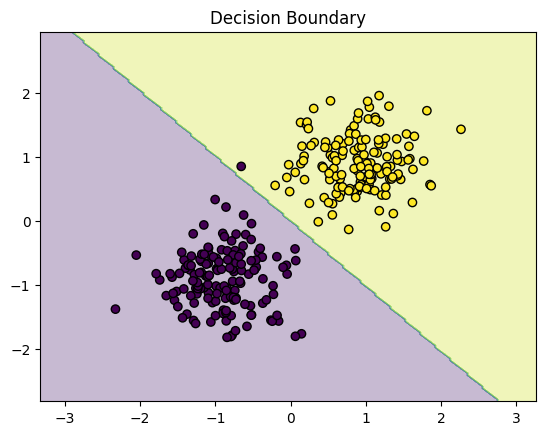

In [13]:
x_min, x_max = X_scaled[:,0].min()-1, X_scaled[:,0].max()+1
y_min, y_max = X_scaled[:,1].min()-1, X_scaled[:,1].max()+1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y, edgecolors='k')
plt.title("Decision Boundary")
plt.show()


In [14]:
import numpy as np

np.random.seed(42)

# Matrix dimensions
n, m = 6, 6

# Random matrix
M = np.random.randn(n, m)

print("Input Matrix:\n", M)


Input Matrix:
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819]
 [-0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375]
 [-0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365]]


In [16]:
class KMeansMatrix:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, M):
        n, m = M.shape

        # Flatten matrix values
        values = M.flatten()

        # Randomly initialize centroids from values
        self.centroids = np.random.choice(values, self.k, replace=False)

        for _ in range(self.max_iters):
            # Assign clusters
            assignments = self._assign_clusters(values)

            # Compute new centroids
            new_centroids = np.array([
                values[assignments == c].mean() if np.any(assignments == c)
                else self.centroids[c]
                for c in range(self.k)
            ])

            # Check convergence
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        # Build outputs
        self.assignment_table = assignments.reshape(n, m)
        self.cookbook = self._build_cookbook(self.assignment_table)

        return self.assignment_table, self.cookbook, self.centroids

    def _assign_clusters(self, values):
        # Compute distances to centroids
        distances = np.abs(values[:, None] - self.centroids[None, :])
        return np.argmin(distances, axis=1)

    def _build_cookbook(self, assignment_table):
        cookbook = {c: [] for c in range(self.k)}

        for i in range(assignment_table.shape[0]):
            for j in range(assignment_table.shape[1]):
                cluster = assignment_table[i, j]
                cookbook[cluster].append((i, j))

        return cookbook


In [17]:
k = 3
kmeans = KMeansMatrix(k=k)

assignment_table, cookbook, centroids = kmeans.fit(M)

print("\nAssignment Table:\n", assignment_table)
print("\nCentroids:\n", centroids)
print("\nCookbook:")
for key, value in cookbook.items():
    print(f"Cluster {key}: {value}")



Assignment Table:
 [[2 2 2 1 2 2]
 [1 2 0 2 0 0]
 [2 0 0 0 0 2]
 [0 0 1 2 2 0]
 [0 2 0 2 0 2]
 [0 1 2 0 2 0]]

Centroids:
 [-0.97083067  1.60504241  0.20311118]

Cookbook:
Cluster 0: [(1, 2), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 5), (4, 0), (4, 2), (4, 4), (5, 0), (5, 3), (5, 5)]
Cluster 1: [(0, 3), (1, 0), (3, 2), (5, 1)]
Cluster 2: [(0, 0), (0, 1), (0, 2), (0, 4), (0, 5), (1, 1), (1, 3), (2, 0), (2, 5), (3, 3), (3, 4), (4, 1), (4, 3), (4, 5), (5, 2), (5, 4)]
